In [1]:
from scipy.io import loadmat
from PIL import Image
import numpy as np
import h5py 
from matplotlib import pyplot as plt
import matplotlib
from scipy.misc import toimage
from utils import *


%matplotlib inline 
def get_image(img, category):
    return Image.open(BERKELEY_IMG_DIR + FILE_SEPERATOR + category + FILE_SEPERATOR + img + ".jpg")

def get_segment(img, category):
    return loadmat(BERKELEY_GT_DIR + FILE_SEPERATOR + category + FILE_SEPERATOR + img + ".mat")
    
def visualize_image(img, category):
    mat = get_segment(img, category)
    jpgfile = get_image(img, category)
    display(jpgfile)
    
    # print(mat.keys())
    # print(mat['groundTruth'][0, 0][0, 0][0]) # segmentation from first human
    # print(mat['groundTruth'][0, 0][0, 0][1]) # Boundaries from first human

    human_participants_num = mat['groundTruth'].shape[1]
    fig=plt.figure(figsize=(15, 20))
    plt.rcParams.update({'font.size': 18})
    for i in range(human_participants_num - 1):
        segm = np.array(mat['groundTruth'][0, i][0, 0][0]) # Load segmentation from ith human
        bound = np.array(mat['groundTruth'][0, i][0, 0][1]) # Load Boundaries from ith human
        fig.add_subplot(human_participants_num, 2, (i * 2 + 1))
        plt.imshow(segm)
        fig.add_subplot(human_participants_num, 2, (i * 2 + 1) + 1)
        plt.imshow(bound)
    plt.show()

# visualize_image('22090', 'train')

(10,)
(10,)


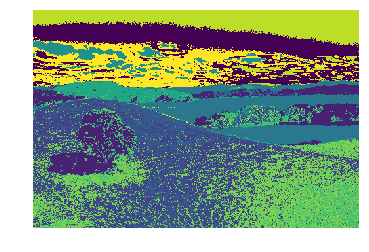

In [2]:
from k_means import *
import glob
import matplotlib.image as mpimg


test_path = BERKELEY_IMG_DIR + FILE_SEPERATOR + 'test'
gt_path = BERKELEY_GT_DIR + FILE_SEPERATOR + 'test'


def get_gt_image(img_name, category):
    mat = get_segment(img_name, category)
    human_participants_num = mat['groundTruth'].shape[1]
    
    height = np.array(mat['groundTruth'][0, 0][0, 0][0]).shape[0]
    width = np.array(mat['groundTruth'][0, 0][0, 0][0]).shape[1]
    gt = np.empty((human_participants_num, height, width, 2))
    for i in range(human_participants_num - 1):
        segm = np.array(mat['groundTruth'][0, i][0, 0][0]) # Load segmentation from ith human
        bound = np.array(mat['groundTruth'][0, i][0, 0][1]) # Load Boundaries from ith human
        gt[i] = np.dstack([bound, segm])
    return gt
    

def load_images(category):
    """
    load images from path for given category set (test, train, val)
    """
    X = [] # images data
    y = [] # ground truth (labels)
    count = 0
    for root, dirnames, filenames in os.walk(f'{BERKELEY_IMG_DIR}/{category}'):
        for image_name in filenames:
            if count > 10:
                break
            count += 1
            if image_name.split('.')[1] != 'jpg':
                continue
            image = mpimg.imread(os.path.join(root, image_name))
            X.append(image)
            y.append(get_gt_image(image_name.split('.')[0], category))
    return np.array(X), np.array(y)
    
X, y = load_images('test')
print(y.shape)
print(X.shape)
plt.imshow(y[0][0][:, :, 0])
    

def segment_images(X):
    for i in range(X.shape[0]):
        for k in [3,5,7,9,11]:
            img = X[i]
            clusters, _ = segment(img, n_clusters=k)
            seg_image = clusters.reshape((img.shape[0], img.shape[1]))
            plt.imshow(seg_image)
            plt.axis('off')
            plt.savefig(f'./images/{i}_{k}.jpg')

segment_images(X)

# img = np.array(get_image('2092', 'train'))
# clusters, _ = segment(img)

# seg_image = clusters.reshape((img.shape[0], img.shape[1]))
# plt.imshow(seg_image)
# plt.axis('off')
# plt.savefig(f'./images/test.jpg')

# seg_image = np.rot90(seg_image, 2)
# seg_image = np.fliplr(seg_image)
# xx = np.arange(img.shape[0])
# yy = np.arange(img.shape[1])
# X, Y = np.meshgrid(yy, xx)

# fig = plt.figure()
# h = plt.contourf(X, Y, seg_image)
# plt.axis('off')
# plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0, wspace = 0)
# plt.savefig(f'./Images/{i}_{k}.jpg')
